# Ratio of Two Gaussian Variates
 >__Created__:  4 June 2019 Harrison B. Prosper, INFN SOS 2019, Paestum, Italy<br>
 >__Updated__: October 2021 for LPC Stats 2021<br>
 >__Updated__: May 2022 for INFN SOS 2022, Paestum, Italy 2022
 
 In this notebook, we approximate the density of the ratio $t = y \, / \, x$ of two
 standard Gaussian variates $x$ and $y$ by simulation and compare the simulated density to the exact result. The domain of $t$ is
 $(-\infty, \infty)$.

The density of a standard Gaussian variate $z$ is $g(z) = \exp(-\frac{1}{2} z^2) \, / \sqrt{2\pi}$, therefore, the density, $p(t)$, can be written as

\begin{align*}
p(t) &= \int_{-\infty}^{\infty}  \int_{-\infty}^{\infty} \delta(t - y \, / \, x) \, g(x) \, g(y) \, dx \, dy ,\\
    &= \frac{1}{2\pi}\int_{-\infty}^{\infty}  \int_{-\infty}^{\infty} \delta(t - y \, / \, x) \, e^{-\frac{1}{2} ( x^2 + y^2)} \, dx \, dy .
\end{align*}

Transforming to polar coordinates $(r, \, \theta)$, defined by $x = r\cos\theta$ and $y = r\sin\theta$, yields
\begin{align*}
p(t) &= \frac{1}{2\pi} \int_{0}^{2\pi} \delta(t - \tan(\theta)) \, d\theta\int_{0}^{\infty}  e^{-\frac{1}{2} r^2} \, r \, dr,\\
&= \frac{1}{2\pi} \int_{0}^{2\pi} \delta(t - \tan(\theta)) \, d\theta.
\end{align*}
This is an elegant integral, but subtle!

On the domain $[0, 2\pi]$, the function $h(\theta) = t - \tan\theta = 0$ has two roots separated by $\pi$. Therefore, since 
$|dh \, / \, d\theta| = 1\, /\,\cos^2\theta$ and is never zero, 
$\delta(h(\theta))$ can be expressed as

\begin{align*}
\delta(h(\theta)) & = \frac{\delta(\theta - \theta_0)}{|dh \, /\, d\theta|_{\theta_0}} + \frac{\delta(\theta - \theta_0 - \pi)}{|dh \, /\, d\theta|_{\theta_0 + \pi}},\\
& = \delta(\theta - \theta_0) \, \cos^2\theta_0 + \delta(\theta - \theta_0 - \pi) \, \cos^2(\theta_0 + \pi),\\
& = \delta(\theta - \theta_0) \, \cos^2\theta_0 + \delta(\theta - \theta_0 - \pi) \, \cos^2(\theta_0).
\end{align*}

Substituting the above into the integral leads to

\begin{align*}
p(t) &= \frac{1}{2\pi} \int_{0}^{2\pi} \delta(t - \tan(\theta)) \, d\theta,
\\
&= \frac{1}{2\pi} \, \cos^2\theta_0 \left[\int_{0}^{2\pi} 
\delta(\theta - \theta_0) \, d\theta + \int_{0}^{2\pi}\delta(\theta - \theta_0 - \pi) \, d\theta \right],
\\
&= \frac{1}{\pi} \, \cos^2\theta_0, \\
&= \frac{1}{\pi} \frac{1}{(1 + t^2)}.
\end{align*}

In [1]:
# system modules
import os, sys

# array manipulation module
import numpy as np

# scientific mathematical methods
import scipy as sp
import scipy.stats as st

# symbolic algebra
import sympy as sm
sm.init_printing() # enable pretty-printing of equations

# high-quality plots
import matplotlib as mp
import matplotlib.pyplot as plt

# make plots appear inline
%matplotlib inline

In [2]:
# update fonts
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 20
        }
mp.rc('font', **font)
mp.rc('xtick', labelsize='x-small')
mp.rc('ytick', labelsize='x-small')
# set usetex = False if latex not available on your machine
mp.rc('text', usetex=True)  # Use local Latex compiler

# set a seed to ensure reproducibility 
# on a given machine
seed = 111
rnd = np.random.RandomState(seed)

### Generate $T = Y \, / \, X$ 

In [3]:
TMIN =-4.0  # t in (TMIN, TMAX)
TMAX = 4.0
N = 1000000

X = rnd.normal(0, 1, N)
Y = rnd.normal(0, 1, N)

T = [y/x for x, y in zip(X, Y)]

### Histogram $T$ and compare with Cauchy density


In [4]:
def Cauchy(t):
    return 1.0/(1 + t**2)/np.pi

In [5]:
def plotData(data, 
             nbins=500,  
             xmin=TMIN, xmax=TMAX,
             ymin= 0, ymax=0.4,
             ftsize=24, 
             color=(0.1,0.3,0.8), 
             fgsize=(8,5)):

    # set size of figure
    plt.figure(figsize=fgsize)
    
    # histogram data
    # returns y, x, o
    # y: counts
    # x: bin boundaries
    # o: objects (not used, hence the use of "_")
    
    # weight each entry explicitly rather than use the
    # density keyword argument, which seems to normalize
    # the plot within the range given by the range argument.
    w = nbins * np.ones(len(data)) / len(data) / (xmax-xmin)
    y, x, _ = plt.hist(data, 
                       bins=nbins,
                       weights=w,
                       color=color,
                       alpha=0.20,
                       range=(xmin, xmax))
    
    # convert bin boundaries to bin centers
    # Note: x[1:]  = x[1], x[2], ..., x[n-1]
    #       x[:-1] = x[0], x[1], ..., x[n-2]
    t = (x[:-1] + x[1:])/2
    f = [Cauchy(z) for z in t]

    # superimpose Cauchy density
    plt.plot(t, f, color=(1,0,0), lw=2)
    
    # add legends 
    plt.legend(['exact', 
                'by simulation'])
    
    # set up x, y limits
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    
    # add x and y labels
    plt.xlabel('$t$', fontsize=ftsize)
    plt.ylabel('$p(t)$', fontsize=ftsize)
    
    # annotate 
    xwid = (xmax-xmin)/10
    ywid = (ymax-ymin)/10
    xpos = xmin + xwid
    ypos = ymin + 8*ywid
    
    plt.text(xpos, ypos, 
             r'$p(t) = \frac{1}{\pi (1 + t^2)}$', 
             fontsize=ftsize)
    
    # tighten layout so that image is fully
    # contained within viewport
    plt.tight_layout()
    
    plt.savefig("fig_ratio_of_two_gaussian_variates.png")
    plt.show()

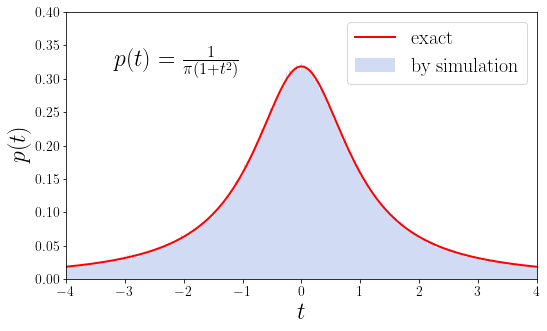

In [6]:
plotData(T)